In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, beta
import random
from sympy import symbols, integrate
from math import prod

In [148]:
DOSE_LEVEL = [1, 2, 3, 4, 5]
y = [0, 1, 4, 3, 0]
n = [3, 6, 12, 6, 0]

## Question 1

### First method

In [149]:
def Method1_M1_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    p_1 = uniform.rvs(loc = 0, scale = 1, size = 1)[0]
    p_2 = uniform.rvs(loc = p_1, scale = 1 - p_1, size = 1)[0]
    p_3 = uniform.rvs(p_2, 1 - p_2, size = 1)[0]
    p_4 = uniform.rvs(p_3, 1 - p_3, size = 1)[0]
    p_5 = uniform.rvs(p_4, 1 - p_4, size = 1)[0]

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

def Method1_M2_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    p_1 = uniform.rvs(loc = 0, scale = 1, size = 1)[0]
    p_2 = uniform.rvs(loc = 0, scale = p_1, size = 1)[0]
    p_3 = uniform.rvs(loc = 0, scale = p_2, size = 1)[0]
    p_4 = uniform.rvs(loc = 0, scale = p_3, size = 1)[0]
    p_5 = uniform.rvs(loc = 0, scale = p_4, size = 1)[0]

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

def Method1_M3_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    p_1 = uniform.rvs(0, 1, size = 1)[0]
    p_2 = uniform.rvs(p_1, 1 - p_1, size = 1)[0]
    p_3 = uniform.rvs(p_2, 1 - p_2, size = 1)[0]
    p_4 = uniform.rvs(0, p_3, size = 1)[0]
    p_5 = uniform.rvs(0, p_4, size = 1)[0]

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

print(f"The 5 probability samples generated from M1: {Method1_M1_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M2: {Method1_M2_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M3: {Method1_M3_generator(Q1 = True)}")

The 5 probability samples generated from M1: [0.45571091466811897, 0.5612612802557018, 0.8624188213142363, 0.8657826909514685, 0.9154688051978277]
The 5 probability samples generated from M2: [0.45571091466811897, 0.08837298954128828, 0.06066068716651454, 0.001483158130220272, 0.0005490526134516267]
The 5 probability samples generated from M3: [0.45571091466811897, 0.5612612802557018, 0.8624188213142363, 0.021086201726927923, 0.007805933790902358]


### Second method

In [150]:
def Method2_M1_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    five_samples = sorted(uniform.rvs(0, 1, size = 5))
    p_1 = five_samples[0]
    p_2 = five_samples[1]
    p_3 = five_samples[2]
    p_4 = five_samples[3]
    p_5 = five_samples[4]

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

def Method2_M2_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    five_samples = sorted(uniform.rvs(0, 1, size = 5))
    p_1 = five_samples[4]
    p_2 = five_samples[3]
    p_3 = five_samples[2]
    p_4 = five_samples[1]
    p_5 = five_samples[0]

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

def Method2_M3_generator(Q1 = False):
    if Q1:
        np.random.seed(4610)
    five_samples = uniform.rvs(0, 1, size = 5)
    # We don't sort them
    p_3 = max(five_samples)
    
    remaining_numbers = [num for num in five_samples if num != p_3]
    random.shuffle(remaining_numbers)

    p_1 = remaining_numbers[0]
    p_2 = remaining_numbers[1]
    p_4 = remaining_numbers[2]
    p_5 = remaining_numbers[3]
    if (p_1 > p_2):
        temp = p_1
        p_1 = p_2
        p_2 = temp
    
    if (p_5 > p_4):
        temp = p_5
        p_5 = p_4
        p_4 = temp

    result = [p_1, p_2, p_3, p_4, p_5]
    return result

print(f"The 5 probability samples generated from M1: {Method2_M1_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M1: {Method2_M2_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M1: {Method2_M3_generator(Q1 = True)}")

The 5 probability samples generated from M1: [0.02445007136416011, 0.19392335512887104, 0.37019155426811023, 0.45571091466811897, 0.686416601739761]
The 5 probability samples generated from M1: [0.686416601739761, 0.45571091466811897, 0.37019155426811023, 0.19392335512887104, 0.02445007136416011]
The 5 probability samples generated from M1: [0.19392335512887104, 0.37019155426811023, 0.686416601739761, 0.45571091466811897, 0.02445007136416011]


### Third method

In [151]:
def Method3_M1_generator(initial_result = Method1_M1_generator(Q1 = True), Q1 = False):
    if Q1:
        np.random.seed(4610)
    p1_old, p2_old, p3_old, p4_old, p5_old = initial_result[0], initial_result[1], initial_result[2], initial_result[3], initial_result[4]
    p1_new = uniform.rvs(loc = 0, scale = p2_old, size = 1)[0]
    p2_new = uniform.rvs(loc = p1_old, scale = p3_old - p1_old)
    p3_new = uniform.rvs(loc = p2_old, scale = p4_old - p2_old) 
    p4_new = uniform.rvs(loc = p3_old, scale = p5_old - p3_old)
    p5_new = uniform.rvs(loc = p4_old, scale = 1 - p4_old)

    result = [p1_new, p2_new, p3_new, p4_new, p5_new]
    return result

def Method3_M2_generator(initial_result = Method1_M2_generator(Q1 = True), Q1 = False):
    if Q1:
        np.random.seed(4610)
    p1_old, p2_old, p3_old, p4_old, p5_old = initial_result[0], initial_result[1], initial_result[2], initial_result[3], initial_result[4]
    p1_new = uniform.rvs(loc = p2_old, scale = 1 - p2_old, size = 1)[0]
    p2_new = uniform.rvs(loc = p3_old, scale = p1_old - p3_old)
    p3_new = uniform.rvs(loc = p4_old, scale = p2_old - p4_old) 
    p4_new = uniform.rvs(loc = p5_old, scale = p3_old - p5_old)
    p5_new = uniform.rvs(loc = 0, scale = p4_old)

    result = [p1_new, p2_new, p3_new, p4_new, p5_new]
    return result

def Method3_M3_generator(initial_result = Method1_M3_generator(Q1 = True), Q1 = False):
    if Q1:
        np.random.seed(4610)
    p1_old, p2_old, p3_old, p4_old, p5_old = initial_result[0], initial_result[1], initial_result[2], initial_result[3], initial_result[4]
    p1_new = uniform.rvs(loc = 0, scale = p2_old, size = 1)[0]
    p2_new = uniform.rvs(loc = p1_old, scale = p3_old - p1_old)
    p3_new = uniform.rvs(loc = max(p2_old, p4_old), scale = 1 - max(p2_old, p4_old)) 
    p4_new = uniform.rvs(loc = p5_old, scale = p3_old - p5_old)
    p5_new = uniform.rvs(loc = 0, scale = p4_old)

    result = [p1_new, p2_new, p3_new, p4_new, p5_new]
    return result

print(f"The 5 probability samples generated from M1: {Method3_M1_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M1: {Method3_M2_generator(Q1 = True)}")
print(f"The 5 probability samples generated from M1: {Method3_M3_generator(Q1 = True)}")

The 5 probability samples generated from M1: [0.2557728913931253, 0.5345810764823737, 0.7702898321424881, 0.8637158972060577, 0.9154688051978277]
The 5 probability samples generated from M1: [0.5038113683135906, 0.1372701527280495, 0.061125780933146315, 0.0020187863680903276, 0.0005490526134516267]
The 5 probability samples generated from M1: [0.2557728913931253, 0.5345810764823737, 0.8624188213142363, 0.02870127987957881, 0.007805933790902358]


## Question 2

In [152]:
N = 100000

def plot_method(data, model, method, height1 = 2, height2 = 10, height3 = 20, height4 = 40, height5 = 40):
    data_p1 = data[['p1']]
    data_p2 = data[['p2']]
    data_p3 = data[['p3']]
    data_p4 = data[['p4']]
    data_p5 = data[['p5']]

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.hist(data_p1, bins=100, density=True, alpha=0.6, label='p1')
    plt.title('p1')
    plt.xlim(-0.25, 1.25)
    plt.ylim(0, height1)

    plt.subplot(2, 3, 2)
    plt.hist(data_p2, bins=100, density=True, alpha=0.6, label='p2')
    plt.title('p2')
    plt.xlim(-0.25, 1.25)
    plt.ylim(0, height2)

    plt.subplot(2, 3, 3)
    plt.hist(data_p3, bins=100, density=True, alpha=0.6, label='p3')
    plt.title('p3')
    plt.xlim(-0.25, 1.25)
    plt.ylim(0, height3)

    plt.subplot(2, 3, 4)
    plt.hist(data_p4, bins=100, density=True, alpha=0.6, label='p4')
    plt.title('p4')
    plt.xlim(-0.25, 1.25)
    plt.ylim(0, height4)

    plt.subplot(2, 3, 5)
    plt.hist(data_p5, bins=100, density=True, alpha=0.6, label='p5')
    plt.title('p5')
    plt.xlim(-0.25, 1.25)
    plt.ylim(0, height5)

    plt.suptitle(f'Probabilities generated from Model {model} Under Method {method}.')

    plt.tight_layout()

    plt.show()

### Method 1

In [153]:
def Method1_M1():
    result = []
    for i in range(N):
        result.append(Method1_M1_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method1_M1_samples = Method1_M1()

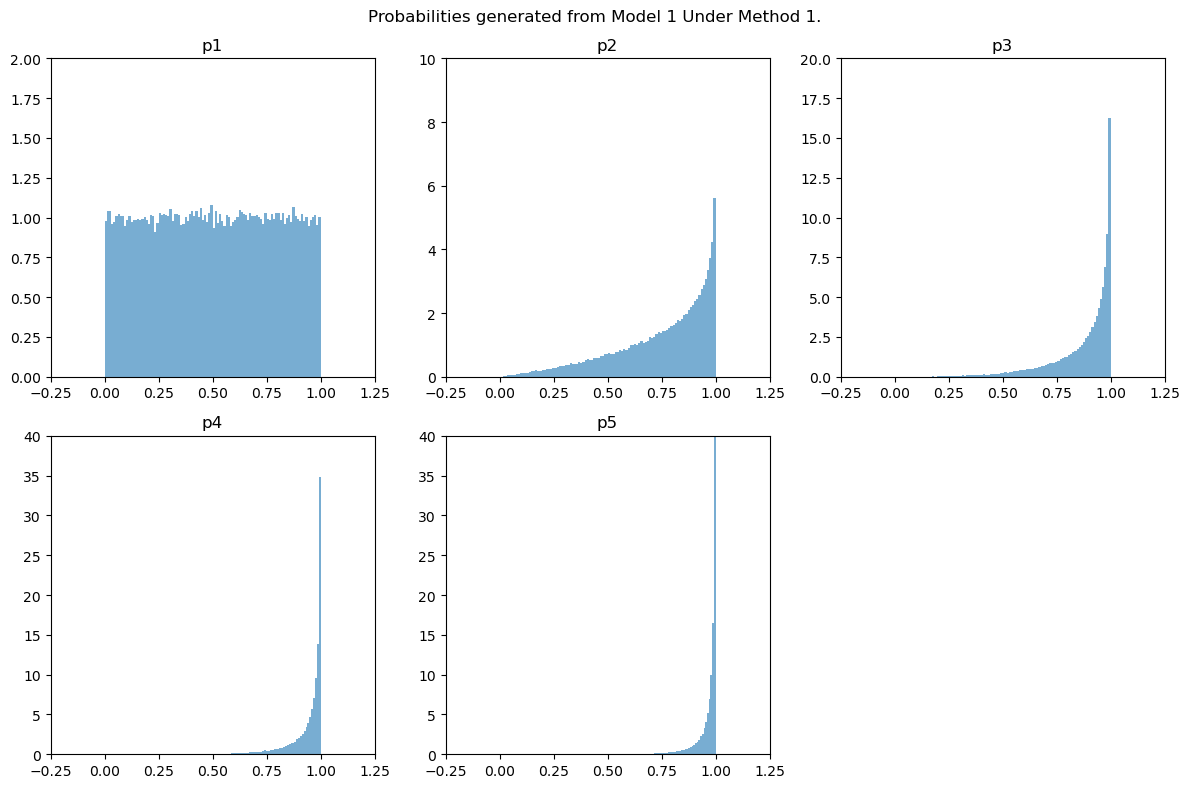

In [154]:
plot_method(Method1_M1_samples, 1, 1)

In [155]:
def Method1_M2():
    result = []
    for i in range(N):
        result.append(Method1_M2_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method1_M2_samples = Method1_M2()

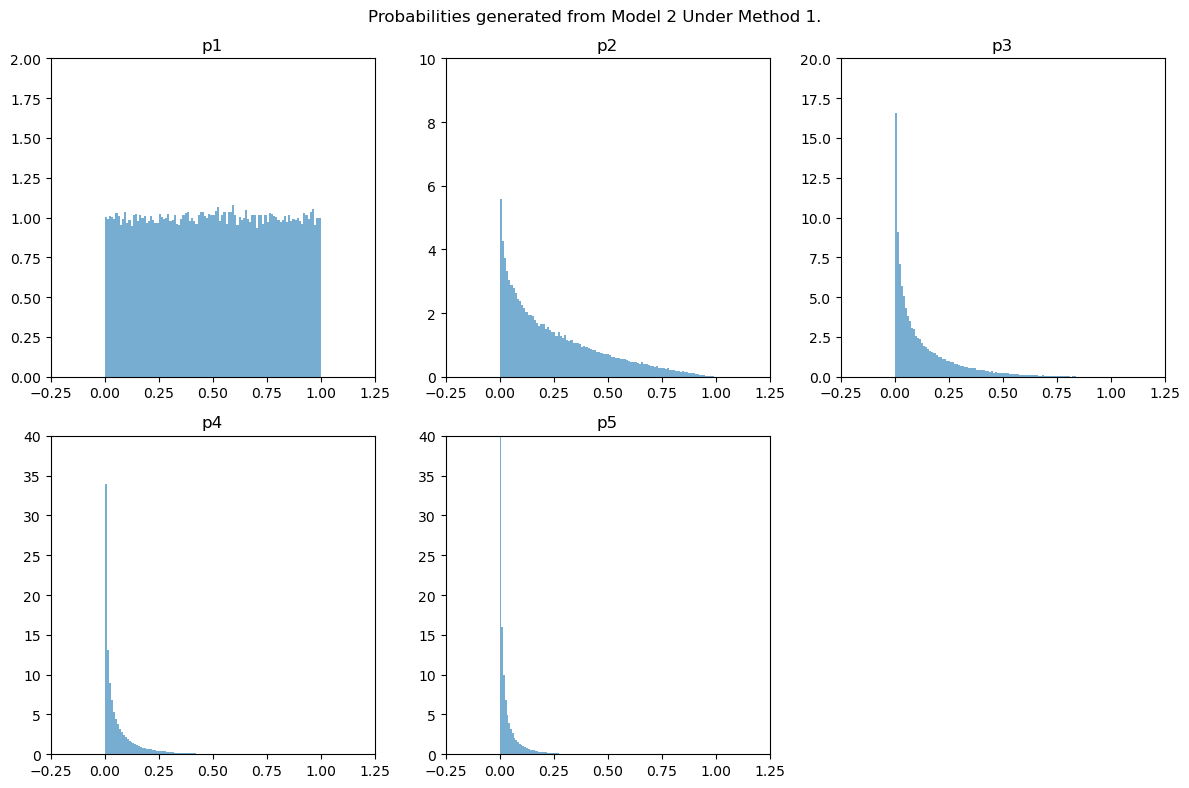

In [156]:
plot_method(Method1_M2_samples, 2, 1)

In [157]:
def Method1_M3():
    result = []
    for i in range(N):
        result.append(Method1_M3_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method1_M3_samples = Method1_M3()

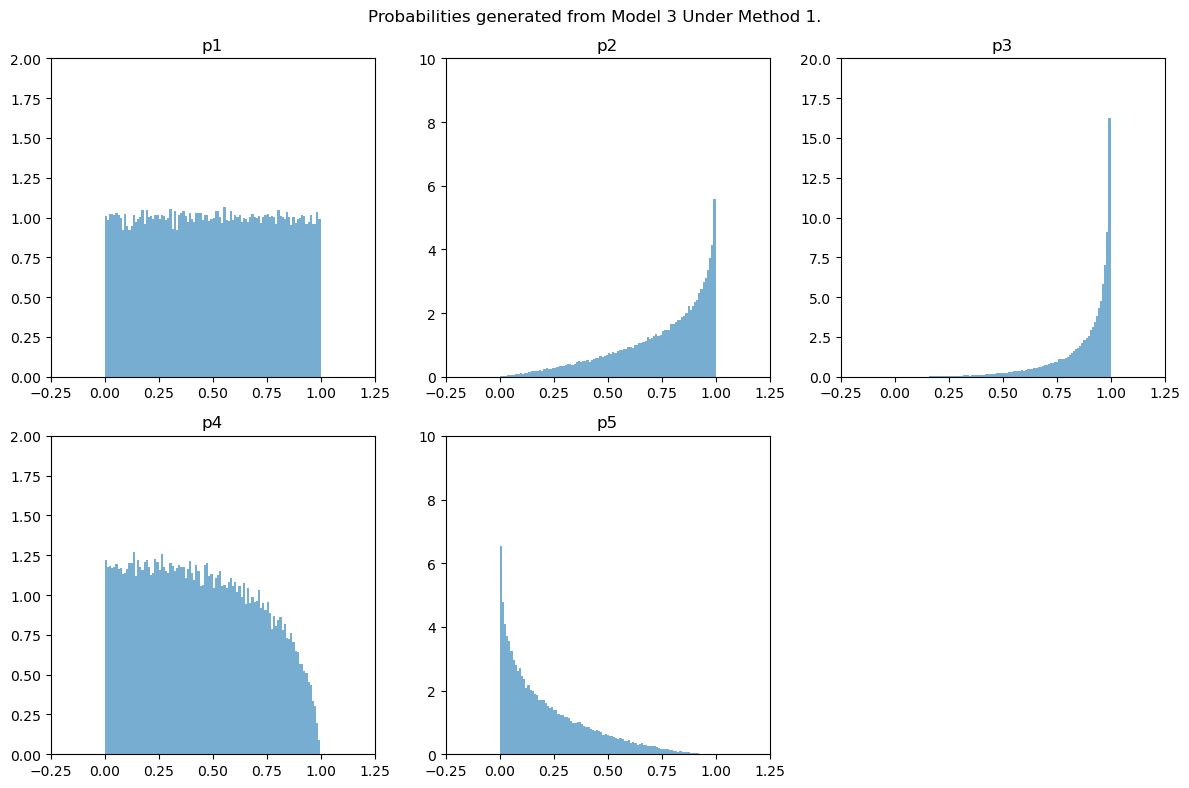

In [158]:
plot_method(Method1_M3_samples, 3, 1, height4=2, height5=10)

### Method 2

In [159]:
def Method2_M1():
    result = []
    for i in range(N):
        result.append(Method2_M1_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method2_M1_samples = Method2_M1()

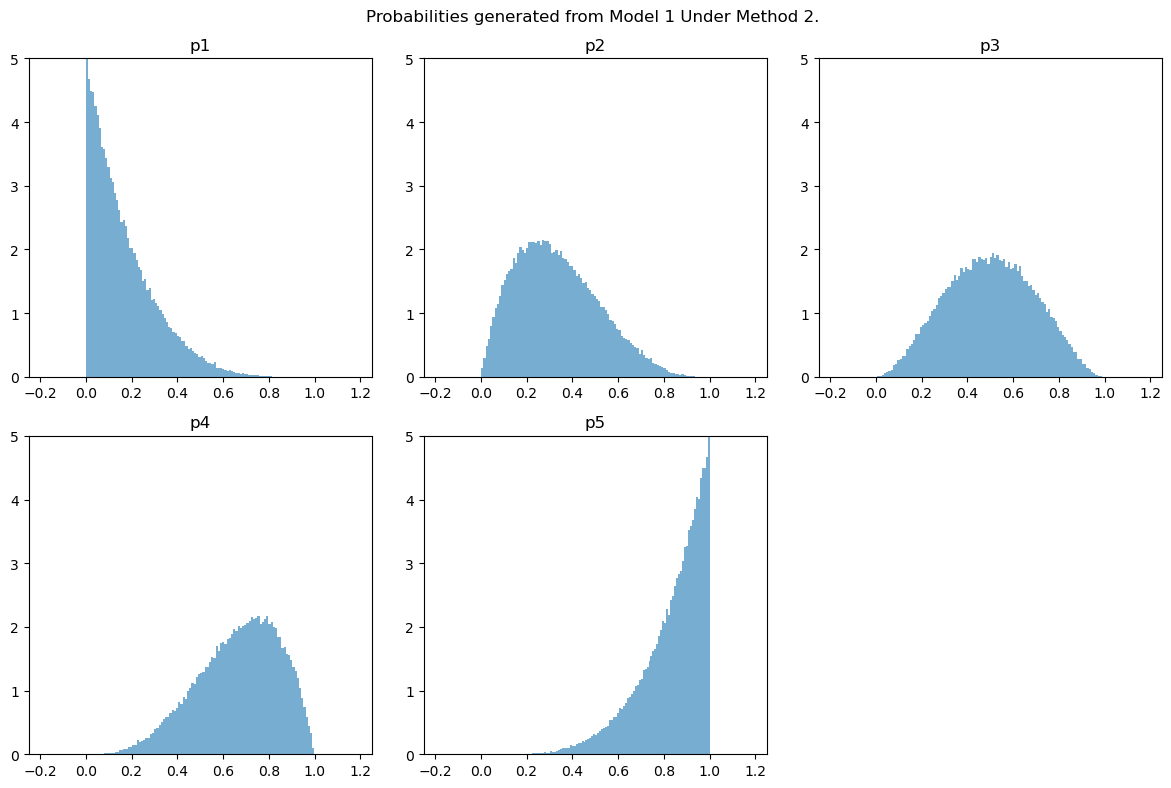

In [160]:
plot_method(Method2_M1_samples, 1, 2, height1=5, height2=5, height3=5, height4=5, height5=5)

In [161]:
def Method2_M2():
    result = []
    for i in range(N):
        result.append(Method2_M2_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method2_M2_samples = Method2_M2()

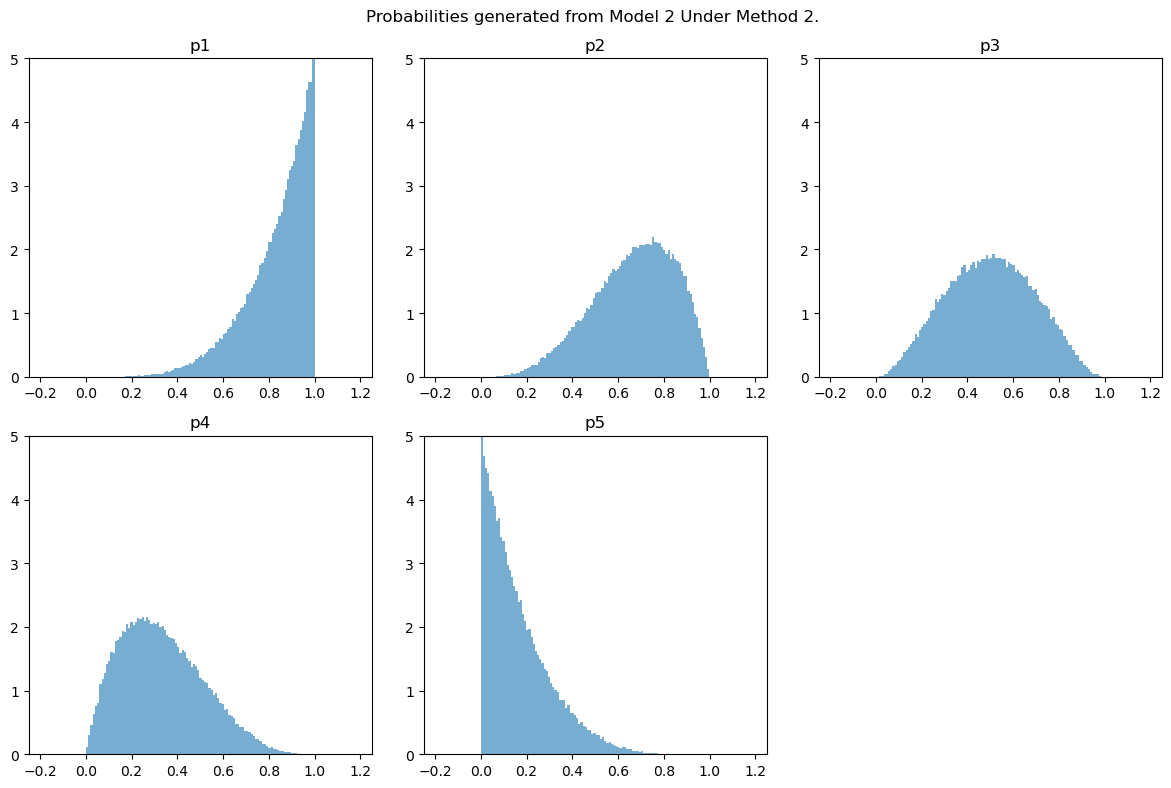

In [162]:
plot_method(Method2_M2_samples, 2, 2, height1=5, height2=5, height3=5, height4=5, height5=5)

In [163]:
def Method2_M3():
    result = []
    for i in range(N):
        result.append(Method2_M3_generator())
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method2_M3_samples = Method2_M3()

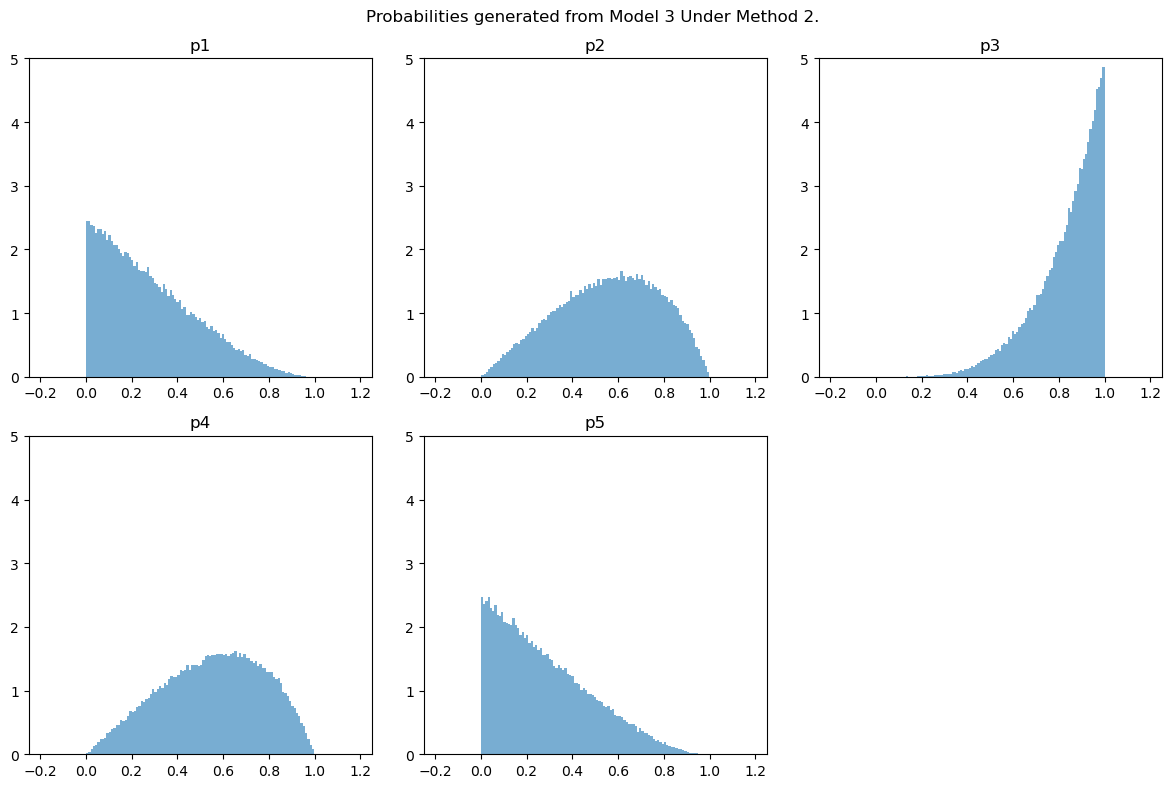

In [164]:
plot_method(Method2_M3_samples, 3, 2, height1=5, height2=5, height3=5, height4=5, height5=5)

### Method 3

In [165]:
def Method3_M1():
    result = []
    result.append(Method3_M1_generator())

    for i in range(N - 1):
        result.append(Method3_M1_generator(result[i]))
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method3_M1_samples = Method3_M1()

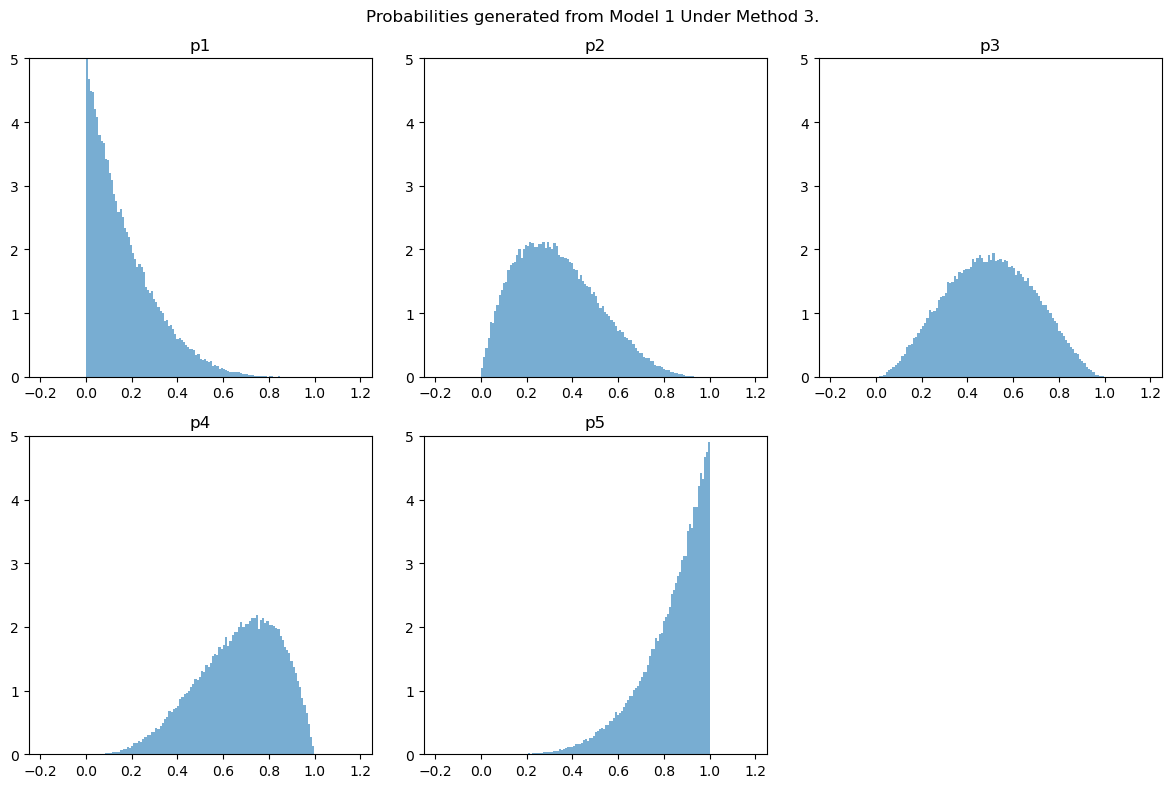

In [166]:
plot_method(Method3_M1_samples, 1, 3, height1= 5, height2=5, height3=5, height4=5, height5=5)

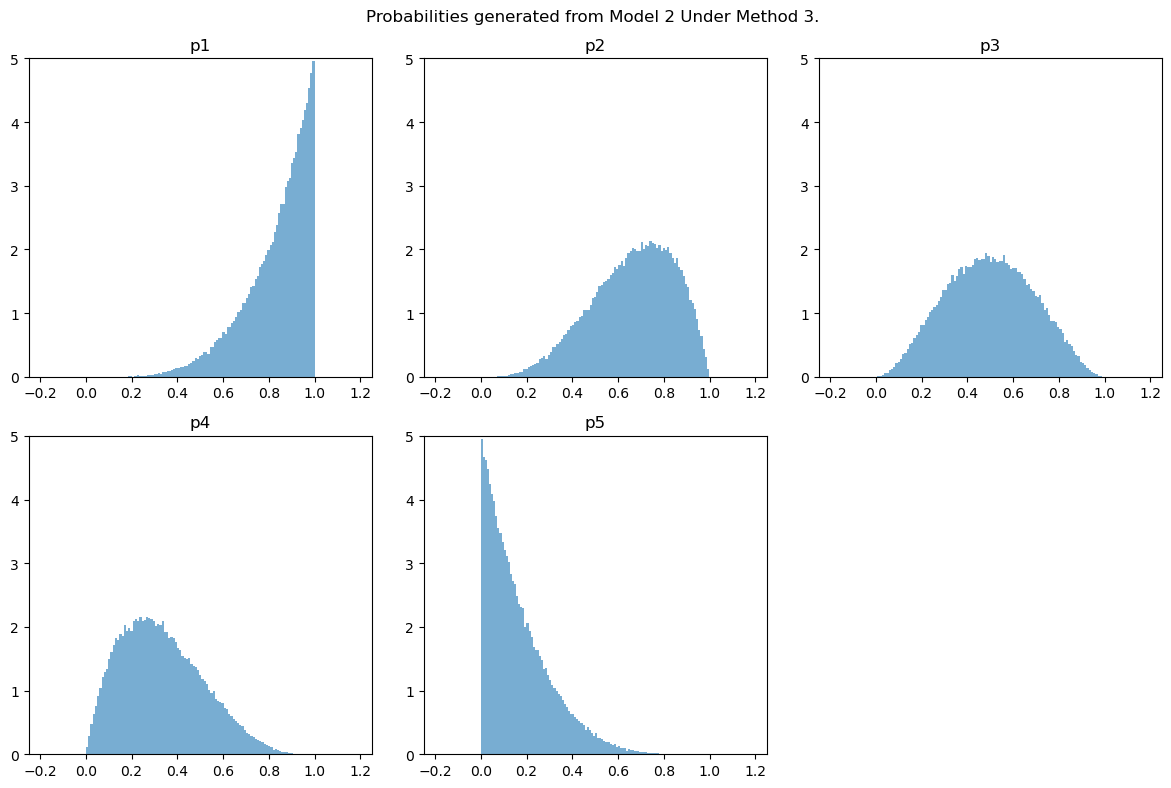

In [167]:
def Method3_M2():
    result = []
    result.append(Method3_M2_generator())

    for i in range(N - 1):
        result.append(Method3_M2_generator(result[i]))
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method3_M2_samples = Method3_M2()
plot_method(Method3_M2_samples, 2, 3, height1= 5, height2=5, height3=5, height4=5, height5=5)

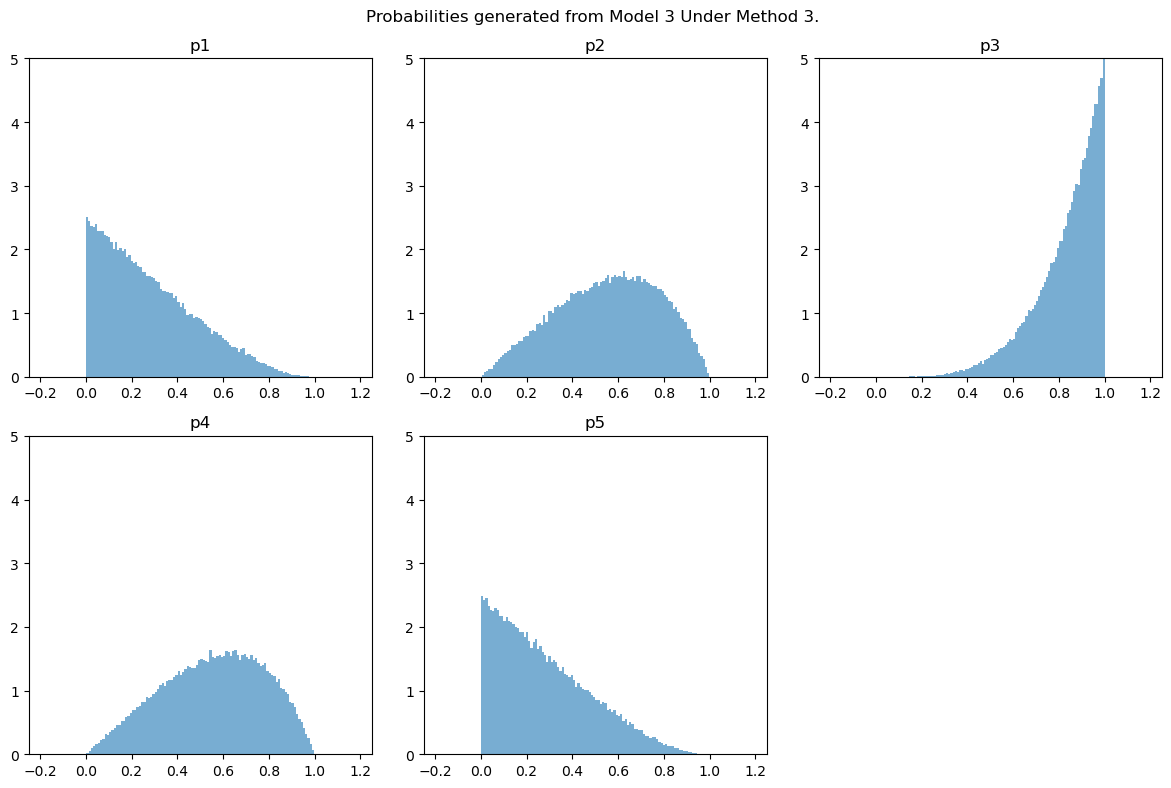

In [168]:
def Method3_M3():
    result = []
    result.append(Method3_M3_generator())

    for i in range(N - 1):
        result.append(Method3_M3_generator(result[i]))
    result = np.asarray(result)
    result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

Method3_M3_samples = Method3_M3()
plot_method(Method3_M3_samples, 3, 3, height1= 5, height2=5, height3=5, height4=5, height5=5)

## Question 3

In [169]:
def truncatedbeta(a, b, lower, upper):
    sample = beta.rvs(a, b, size = 1)
    while (sample < lower or sample > upper):
        sample = beta.rvs(a, b, size = 1)
    return sample

def M1_gibbs_sampling(beta_coef, last_result = Method1_M1_generator(Q1 = True)):   
    p_1 = truncatedbeta(beta_coef[0][0], beta_coef[0][1], 0, last_result[1])
    p_2 = truncatedbeta(beta_coef[1][0], beta_coef[1][1], last_result[0], last_result[2])
    p_3 = truncatedbeta(beta_coef[2][0], beta_coef[2][1], last_result[1], last_result[3])
    p_4 = truncatedbeta(beta_coef[3][0], beta_coef[3][1], last_result[2], last_result[4])
    p_5 = truncatedbeta(beta_coef[4][0], beta_coef[4][1], last_result[3], 1)
    return [p_1, p_2, p_3, p_4, p_5]

def M2_gibbs_sampling(beta_coef, last_result = Method1_M2_generator(Q1 = True)):
    p_1 = truncatedbeta(beta_coef[0][0], beta_coef[0][1], last_result[1], 1)
    p_2 = truncatedbeta(beta_coef[1][0], beta_coef[1][1], last_result[2], last_result[0])
    p_3 = truncatedbeta(beta_coef[2][0], beta_coef[2][1], last_result[3], last_result[1])
    p_4 = truncatedbeta(beta_coef[3][0], beta_coef[3][1], last_result[4], last_result[2])
    p_5 = truncatedbeta(beta_coef[4][0], beta_coef[4][1], 0, last_result[3])
    return [p_1, p_2, p_3, p_4, p_5]

def M3_gibbs_sampling(beta_coef, last_result = Method1_M3_generator(Q1 = True)):
    p_1 = truncatedbeta(beta_coef[0][0], beta_coef[0][1], 0, last_result[1])
    p_2 = truncatedbeta(beta_coef[1][0], beta_coef[1][1], last_result[0], last_result[2])
    p_3 = truncatedbeta(beta_coef[2][0], beta_coef[2][1], max(last_result[1], last_result[3]), 1)
    p_4 = truncatedbeta(beta_coef[3][0], beta_coef[3][1], last_result[4], last_result[2])
    p_5 = truncatedbeta(beta_coef[4][0], beta_coef[4][1], 0, last_result[3])
    return [p_1, p_2, p_3, p_4, p_5]

def M1_gibbs(beta_coef, starts_with, warm_up = 10000):
    result = []
    result.append(starts_with)

    for i in range(N - 1 + warm_up):
        result.append(M1_gibbs_sampling(beta_coef, result[i]))
    result = np.asarray(result)[warm_up:].reshape(N, 5)
    # result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

def M2_gibbs(beta_coef, starts_with, warm_up = 10000):
    result = []
    result.append(starts_with)

    for i in range(N - 1 + warm_up):
        result.append(M2_gibbs_sampling(beta_coef, result[i]))
    result = np.asarray(result)[warm_up:].reshape(N, 5)
    # result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

def M3_gibbs(beta_coef, starts_with, warm_up = 10000):
    result = []
    result.append(starts_with)

    for i in range(N - 1 + warm_up):
        result.append(M3_gibbs_sampling(beta_coef, result[i]))
    result = np.asarray(result)[warm_up:].reshape(N, 5)
    # result = pd.DataFrame(result, columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
    return result

In [170]:
beta_coef = [[1,4], [2,6], [5,9], [4,4], [1,1]]
beta_coef = np.asarray(beta_coef)

In [171]:
def likelihood_function(sample, beta_coef):
    return prod(
        [p ** (beta_coef[i][0] - 1) * (1 - p) ** (beta_coef[i][1] - 1) for i, p in enumerate(sample)]
    )

def M1_posterior_power(beta_coef, c = 5, n = 30):
    ts = np.linspace(0, 1, n)
    results = []
    starts_with = M1_gibbs_sampling(beta_coef)
    for t in ts:
        M1_posterior_sample = M1_gibbs(t**c * (beta_coef - 1) + 1, starts_with)
        results.append(np.mean(np.log(np.apply_along_axis(likelihood_function, 1, M1_posterior_sample, beta_coef=beta_coef))))
        starts_with = np.mean(M1_posterior_sample, axis = 0)
    
    return np.sum([(ts[i] - ts[i-1]) * (results[i] + results[i-1]) / 2 for i in range(1, n)])

def M2_posterior_power(beta_coef, c = 5, n = 30):
    ts = np.linspace(0, 1, n)
    results = []
    starts_with = M2_gibbs_sampling(beta_coef)
    for t in ts:
        M2_posterior_sample = M2_gibbs(t**c * (beta_coef - 1) + 1, starts_with)
        results.append(np.mean(np.log(np.apply_along_axis(likelihood_function, 1, M2_posterior_sample, beta_coef=beta_coef))))
        starts_with = np.mean(M2_posterior_sample, axis = 0)

    return np.sum([(ts[i] - ts[i-1]) * (results[i] + results[i-1]) / 2 for i in range(1, n)])

def M3_posterior_power(beta_coef, c = 5, n = 30):
    ts = np.linspace(0, 1, n)
    results = []
    starts_with = M3_gibbs_sampling(beta_coef)
    for t in ts:
        M3_posterior_sample = M3_gibbs(t**c * (beta_coef - 1) + 1, starts_with)
        results.append(np.mean(np.log(np.apply_along_axis(likelihood_function, 1, M3_posterior_sample, beta_coef=beta_coef))))
        starts_with = np.mean(M3_posterior_sample, axis = 0)
    
    return np.sum([(ts[i] - ts[i-1]) * (results[i] + results[i-1]) / 2 for i in range(1, n)])

In [172]:
M1_log_likelihood = M1_posterior_power(beta_coef)
print(M1_log_likelihood)

C:\Users\asus\AppData\Local\Temp\ipykernel_18220\225830165.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(result)[warm_up:].reshape(N, 5)


-17.672963719836616


In [173]:
M2_log_likelihood = M2_posterior_power(beta_coef)
print(M2_log_likelihood)

C:\Users\asus\AppData\Local\Temp\ipykernel_18220\225830165.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(result)[warm_up:].reshape(N, 5)


-25.312813103610196


In [174]:
M3_log_likelihood = M3_posterior_power(beta_coef)
print(M3_log_likelihood)

C:\Users\asus\AppData\Local\Temp\ipykernel_18220\225830165.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(result)[warm_up:].reshape(N, 5)


-25.519878091461468


In [175]:
# Therefore, we have the likelihood here:
print(f"The posterior likelihood of M1 is: {np.exp(M1_log_likelihood)}")
print(f"The posterior likelihood of M2 is: {np.exp(M2_log_likelihood)}")
print(f"The posterior likelihood of M3 is: {np.exp(M3_log_likelihood)}")

The posterior likelihood of M1 is: 2.1121724693115795e-08
The posterior likelihood of M2 is: 1.0157455951473162e-11
The posterior likelihood of M3 is: 8.25767461646286e-12


### Gibbs Sampler Result

## Question 4

### Model 1

In [183]:
p1, p2, p3, p4, p5 = symbols('p1 p2 p3 p4 p5', real=True)
M1_integrand = (1 - p1)**3 * p2 * (1 - p2)**5 * p3**4 * (1 - p3)**8 * p4**3 * (1 - p4)**3
M1_limits = [(p5, p4, 1), (p4, p3, 1), (p3, p2, 1), (p2, p1, 1), (p1, 0, 1)]

In [184]:
M1_result = integrate(M1_integrand, *M1_limits)
print(M1_result.evalf())

7.38222302275044e-10


### Model 2

In [185]:
p1, p2, p3, p4, p5 = symbols('p1 p2 p3 p4 p5', real=True)
M2_integrand = (1 - p1)**3 * p2 * (1 - p2)**5 * p3**4 * (1 - p3)**8 * p4**3 * (1 - p4)**3
M2_limits = [(p5, 0, p4), (p4, 0, p3), (p3, 0, p2), (p2, 0, p1), (p1, 0, 1)]

In [186]:
M2_result = integrate(M2_integrand, *M2_limits)
print(M2_result.evalf())

5.50779957961358e-12


### Model 3

In [187]:
p1, p2, p3, p4, p5 = symbols('p1 p2 p3 p4 p5', real=True)
M3_integrand = (1 - p1)**3 * p2 * (1 - p2)**5 * p3**4 * (1 - p3)**8 * p4**3 * (1 - p4)**3
M3_limits = [(p5, 0, p4), (p4, 0, p3), (p3, p2, 1), (p2, p1, 1), (p1, 0, 1)]

In [188]:
M3_result = integrate(M3_integrand, *M3_limits)
print(M3_result.evalf())

2.82264736718615e-10


## Question 5

### Gibbs Sampler Result

In [190]:
Gibbs_Sum = np.exp(M1_log_likelihood) + np.exp(M2_log_likelihood) + np.exp(M3_log_likelihood)
Gibbs_M1_ratio = np.exp(M1_log_likelihood) / Gibbs_Sum
Gibbs_M2_ratio = np.exp(M2_log_likelihood) / Gibbs_Sum
Gibbs_M3_ratio = np.exp(M3_log_likelihood) / Gibbs_Sum
print(Gibbs_M1_ratio)
print(Gibbs_M2_ratio)
print(Gibbs_M3_ratio)

0.9991289021396487
0.00048048196635357897
0.0003906158939976176


### Numerical Sampling Result

In [189]:
Numerical_Sum = M1_result.evalf() + M2_result.evalf() + M3_result.evalf()
Numerical_M1_ratio = M1_result.evalf() / Numerical_Sum
Numerical_M2_ratio = M2_result.evalf() / Numerical_Sum
Numerical_M3_ratio = M3_result.evalf() / Numerical_Sum
print(Numerical_M1_ratio)
print(Numerical_M2_ratio)
print(Numerical_M3_ratio)

0.719518534129861
0.00536825271681933
0.275113213153320
